# One-VS-All Logistic Regression and Forward Propogation of an Artificial Neural Network

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
import scipy.io


## One-Vs-All Logistic Regression 
### (i.e. with multiplier target classifications)

First we load the data

In [86]:
X = scipy.io.loadmat('X.mat')
X = X['X']
y = scipy.io.loadmat('y.mat')
y = y['y'].flatten()

In [238]:
def display(X):
    X_reshaped = X.reshape(20, 20).transpose()
    fig, ax = plt.subplots(figsize=[2, 2])
    ax.imshow(X_reshaped)
    plt.show()

We visualise 10 random feature sets

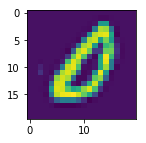

10


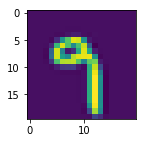

9


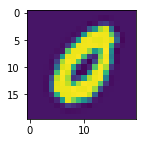

10


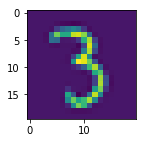

3


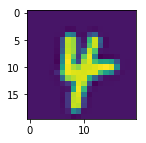

4


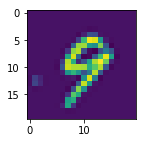

9


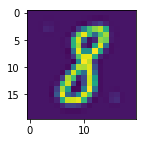

8


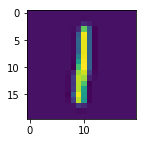

1


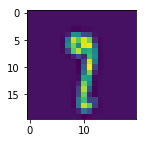

9


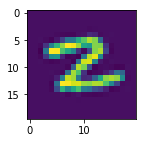

2


In [239]:
for n in np.random.randint(0, 5000, 10):
    display(X[n])
    print(y[n])

In [89]:
# Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
num_labels = 10;          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)
m = X.shape[0]
n = X.shape[1] + 1

In [146]:
def sigmoid(theta, X):
    """
    calcuates sigmoid function 1/(1+e^-(theta^T X))
    """
    thetaT_x = np.matmul(theta, X.transpose())
    return 1/(1 + np.exp(-thetaT_x))


def cost_function(theta, args):
    """
    Calculates the value of the cost function J
    """
    X, y, lamda = args
    m = X.shape[0]
    hypothesis = sigmoid(theta, X)
    J = 1/m*np.sum(-y*np.log(hypothesis) - (1-y)*np.log(1-hypothesis)) \
    + lamda/(2*m)*np.sum(theta[1:]**2)
    return J

def gradient(theta, args):
    """
    Calculates the value of the gradient of the cost 
    function with respect to the theta vector
    """
    X, y, lamda = args
    m = X.shape[0]
    theta_cut = np.copy(theta)
    theta_cut[0] = 0
    hypothesis = sigmoid(theta, X)
    gradient = 1/m*np.sum((hypothesis-y)*X.transpose(), 1) + lamda/m*theta_cut
    return gradient

We check that above functions are correct with some tests.

In [171]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.concatenate([np.ones(5), np.arange(1, 16, 1)/10])
X_t = X_t.reshape([4, 5]).transpose()
y_t = np.array([1, 0, 1, 0, 1])
lamda_t = 3

In [173]:
args = [X_t, y_t, lamda_t]
cost_function(theta_t, args)

2.5348193961097438

Expected cost: 2.534819

In [174]:
gradient(theta_t, args)

array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296])

Expected gradients: 0.146561, -0.548558, 0.724722, 1.398003

We now have the code to train the 10 classifiers for the 10 possible values of the target variable

In [208]:
def train_all_vs_one(X, y, num_labels, lamda):    
    all_theta = np.zeros([num_labels, n])
    X = np.insert(X, 0, 1, 1) # insert column of ones 
    for k in range(1, num_labels+1):
        print(k)
        y_k = (y == k).astype(float)
        initial_theta = all_theta[k-1, :]
        
        result = scipy.optimize.minimize(cost_function, 
        x0=initial_theta, 
        jac=gradient,
        args= [X, y_k, lamda],
        method='CG',
        options={'disp':True,}
        )
        theta = result.x
        #print(result)
        all_theta[k-1, :] = theta
    return all_theta

We perform the training on our data.

In [209]:
lamda = 0.1
all_theta = train_all_vs_one(X, y, 10, lamda)

1
Optimization terminated successfully.
         Current function value: 0.013124
         Iterations: 104
         Function evaluations: 395
         Gradient evaluations: 395
2
Optimization terminated successfully.
         Current function value: 0.050819
         Iterations: 178
         Function evaluations: 545
         Gradient evaluations: 545
3
Optimization terminated successfully.
         Current function value: 0.057611
         Iterations: 245
         Function evaluations: 728
         Gradient evaluations: 728
4
Optimization terminated successfully.
         Current function value: 0.033078
         Iterations: 218
         Function evaluations: 715
         Gradient evaluations: 715
5
Optimization terminated successfully.
         Current function value: 0.054460
         Iterations: 252
         Function evaluations: 745
         Gradient evaluations: 745
6
Optimization terminated successfully.
         Current function value: 0.018262
         Iterations: 147
        

In [277]:
def predict(all_theta, X):
    X = np.insert(X, 0, 1, 1) # insert column of ones 
    probabilities = np.matmul(all_theta, X.transpose())
    prediction = np.argmax(probabilities, axis=0) + 1 # get index of maximum element for each array of probability predictions for each classifier applied to each dataset (+1 to translate indexing to prediction)
    return prediction

In [278]:
pred_ova = predict(all_theta, X)

In [279]:
accuracy = np.sum(pred_ova == y)/y.shape[0]
print("Accuracy = {:.1f}%".format(accuracy*100))

Accuracy = 90.4%


## Forward Propogation of Neural Network

#### Here we will perform forward propogation of an already trained neural network.

First we load the weights for the network.

In [250]:
Theta1 = scipy.io.loadmat('Theta1.mat')
Theta1 = Theta1['Theta1']
Theta2 = scipy.io.loadmat('Theta2.mat')
Theta2 = Theta2['Theta2']

In [280]:
def sigmoid(z):
    """
    calcuates sigmoid function 1/(1+e^-(z))
    """
    return 1/(1 + np.exp(-z))


def predict(Theta1, Theta2, X):
    """
    Perform forward-propogation to calculate the hypothesis 
    of the neural network for the 10 output layer nodes
    and select the largest valued node as the predicted 
    target variable (i.e. predicted label - the number in the image).
    """
    X = np.insert(X, 0, 1, 1) # insert column of ones 

    z2 = np.matmul(Theta1, X.transpose())  # calculate product of weights matrix with input layer
    a2 = sigmoid(z2); # calculate activation fn of 2nd layer (hidden layer)

    # Add ones to the a2 node activation matrix
    a2 = np.insert(a2, 0, 1, 0)

    z3 = np.matmul(Theta2, a2) # calculate product of weights matrix with 1st hidden layer
    h = sigmoid(z3); # calculate hypothesis fn of output layer
    
    prediction = np.argmax(h, axis=0) + 1 # get index of maximum element for each array of probability predictions for each classifier applied to each dataset (+1 to translate indexing to prediction)

    return prediction
    


In [281]:
pred_nn = predict(Theta1, Theta2, X)

In [283]:
accuracy = np.sum(pred_nn == y)/y.shape[0]
print("Accuracy = {:.1f}%".format(accuracy*100))

Accuracy = 97.5%
